## 4) Problem Coding A

In [1]:
import context
import numpy as np
from matplotlib import pyplot as plt

******************************
context imported. Front of path:
/Users/tschmidt/repos/numeric_students
back of path: /Users/tschmidt/.ipython
******************************

through /Users/tschmidt/repos/numeric_students/numeric_notebooks/lab4/context.py


In [2]:
#Here is where I create my heun method.
def heun(coeff, y, derivs):
    k1 = coeff.dt*derivs(coeff,y)
    k2 = coeff.dt*derivs(coeff,y+(2/3)*k1)
    ynew = y + (1/4)*k1 + (3/4)*k2
    return ynew

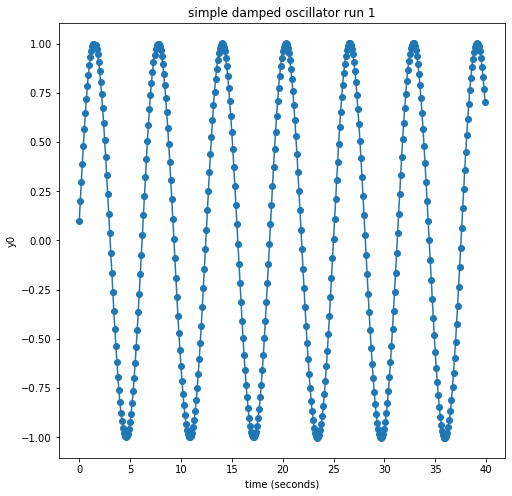

In [3]:
from numlabs.lab4.example.do_example import get_init
#
# specify the derivs function
#
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f

coeff=get_init()

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=heun(coeff,y,derivs)
    savedata[i]=y[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0');

As shown above, it seems that the heun method is far more stable than the forward Euler method and the amplitude of the oscillation is not blowing up.

## Problem 5) Coding B

In [4]:
from collections import namedtuple

initialVals = {
    'yinitial': 1,
    't_beg': 0.,
    't_end': 10,
    'dt': 0.1,
    'c1': 1.,
    'c2': -1.,
    'c3': 1.
}
initialVals['plot_title'] = 'Start at Y0 = 1'


def my_get_init():
    #
    # convert dictionary to namedtuple
    # and return it  
    #
    initvals = namedtuple('initvals',
                          'dt c1 c2 c3 t_beg t_end yinitial plot_title')
    theCoeff = initvals(**initialVals)
    return theCoeff

In [5]:
def heun_t(coeff, y, derivs, t):
    k1 = coeff.dt*derivs(coeff,y, t)
    k2 = coeff.dt*derivs(coeff,y+(2/3)*k1, t+(2/3)*coeff.dt)
    ynew = y + (1/4)*k1 + (3/4)*k2
    return ynew

def midpointinter41(coeff, y, derivs, theTime):
    midy=y + 0.5 * coeff.dt * derivs(coeff,y,theTime)
    y = y + coeff.dt*derivs(coeff,midy,theTime+0.5*coeff.dt)
    return y

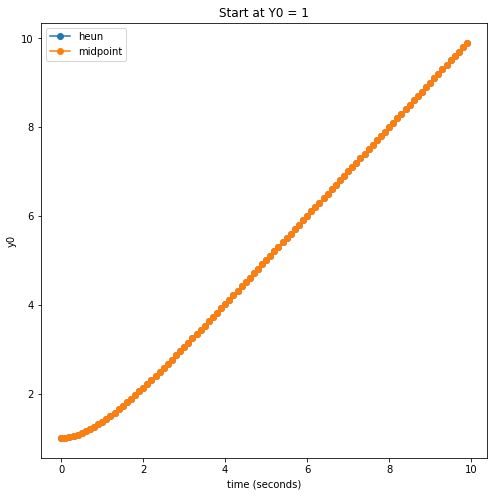

In [6]:
#
# specify the derivs function
#
def derivs(coeff, y, t):
  f= coeff.c1*t + coeff.c2*y + coeff.c3
  return f

def make_plots():
    coeff=my_get_init()
    time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    y1=coeff.yinitial
    y2=coeff.yinitial
    nsteps=len(time) 
    savedata=np.empty([nsteps],np.float64)
    savedata2=np.empty([nsteps],np.float64)
    savedata[0] = y1
    savedata2[0] = y2
    for i in np.arange(1,nsteps):
        y1=heun_t(coeff,y1,derivs,time[i-1])
        savedata[i]=y1
    for i in np.arange(1,nsteps):
        y2=midpointinter41(coeff,y2,derivs,time[i-1])
        savedata2[i]=y2
    theFig,theAx=plt.subplots(1,1,figsize=(8,8))
    theAx.plot(time,savedata,'o-',label="heun")
    theAx.plot(time,savedata2,'o-',label="midpoint")
    theAx.set_title(coeff.plot_title)
    theAx.set_xlabel('time (seconds)')
    theAx.set_ylabel('y0');
    theAx.legend()

make_plots()

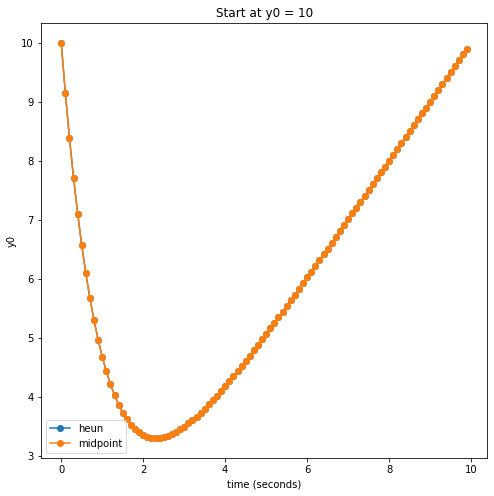

In [7]:
initialVals = {
    'yinitial': 10,
    't_beg': 0.,
    't_end': 10,
    'dt': 0.1,
    'c1': 1.,
    'c2': -1.,
    'c3': 1.
}
initialVals['plot_title'] = 'Start at y0 = 10'
make_plots()

It seems that having different initial conditions has no affect on where the system ends up. Also, it seems with the timestep I have chosen and with the scale of the graph there is no noticable difference between the 2 methods. It makes sense that there is no difference between the 2 methods as they both are using derivatives that are located between the previous y and the next y. They are just taking them at different locations. The heun method may be more stable than the midpoint method with a larger timestep but at this size they yield almost identical answers.